Télécharger cet IPython-Notebook : [cryptographe_Bazeries.ipynb](cryptographe_Bazeries.ipynb)
<p style="text-align:center;font-size:200%">Le cryptographe cylindrique du Commandant Bazeries</p>
****

## 1. Description et utilisation du cryptographe

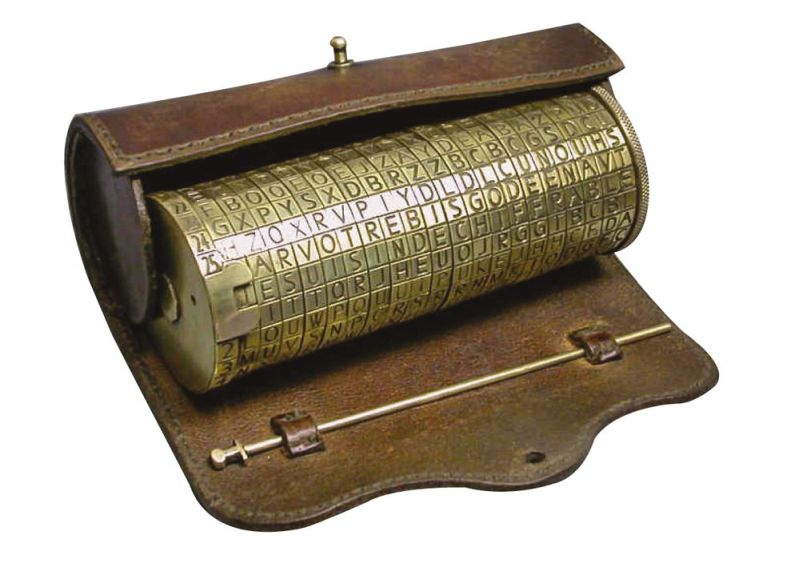

In [1]:
from IPython.display import Image
Image('bazeries.jpg')

[ Image de la réplique du cryptographe Bazeries exposée à l'[Espace Ferrié - Musée des Transmissions](http://www.petit-patrimoine.com/fiche-petit-patrimoine.php?id_pp=35051_1) et confectionnée par l'[Atelier MAQUARTHIS](http://www.maquarthis.com/esat/). ]

Suivant son inventeur, le cryptographe se compose de :
1. Un corps cylindrique, terminé à une extrémité par un disque invariablement fixé sur le cylindre et présentant une fourche indicatrice, et à l'autre extrémité par un disque moleté de fermeture se vissant sur le cylindre ;
2. Des rondelles-alphabets au nombre de vingt, portant chacune un alphabet de vingt-cinq lettres (Le W, qui n'existe pas dans les alphabets des appareils télégraphiques Hughes et Baudot, a été supprimé sur le cryptographe. Pour chiffrer W, on chiffre deux V successifs).
3. Une baguette-arrêtoir, dont la tête peut se visser dans le disque fixe du corps du cryptographe et dont la tige, en partie noyée dans un sillon longitudinal tracé sur le cylindre, pénètre dans des encoches pratiquées sur les faces intérieures des rondelles et correspondants aux lettres gravées sur les faces extérieures.

### 1.1 Les alphabets

Les vingt alphabets utilisés sont définis dans le livre du Commandant Bazeries _Les chiffres secrets dévoilés_ pages 204 et 205.  
Les six premiers sont donnés par une description, les quatorze suivants sont définis par une phrase-clé de la manière habituelle.

In [2]:
alpha = [
    # 1 ordre normal de A à Z
    'ABCDEFGHIJKLMNOPQRSTUVXYZ',
    # 2 les consonnesd de B à Z suivies des voyelles de A à B
    'BCDFGHJKLMNPQRSTVXZAEIOUY',
    # 3 les voyelles de A à Y intercalées par séries de 6 consonnes de B à Z : 
    'AEBCDFGHIOJKLMNPUYQRSTVXZ',
    # 4 ordre retourné de Z à A
    'ZYXVUTSRQPONMLKJIHGFEDCBA',
    # 5 les voyelles dans l'ordre retourné de Y à Z, intercalées par séries de 2 entre des
    # séries de 6 consonnes retournées également de Z à B :
    'YUZXVTSROIQPNMLKEAJHGFDCB',
    # 6 les consonnes dans l'ordre retourné de Z à B, suivies des voyelles dans le même
    # ordre de Y à A :
    'ZXVTSRQPNMLKJHGFDCBYUOIEA',
    'ALONSEFTDPRIJUGVBCHKMQXYZ',  # 7 Allons enfants de la patrie, le jour de gloire est arrivé
    'BIENHURXLSPAVDTOYMCFGJKQZ',  # 8 Bien heureux les pauvres d'esprit, le royaume des Cieux
    'CHARYBDETSLFGIJKMNOPQUVXZ',  # 9 Charybde et Scilla
    'DIEUPROTGLAFNCBHJKMQSVXYZ',  # 10 Dieu protège la France
    'EVITZLSCOURANDBFGHJKMPQXY',  # 11 Évitez les courants d'air
    'FORMEZLSAICUXBDGHJKNPQTVY',  # 12 Formez les faisceaux
    'GLOIREMTDNSAUXBCFHJKPQVYZ',  # 13 Gloire immortelle de nos aïeux
    'HONEURTPAIBCDFGJKLMQSVXYZ',  # 14 Honneur et Patrie
    'INSTRUEZLAJBCDFGHKMOPQVXY',  # 15 Instruisez la jeunesse
    'JAIMELOGNFRTHUBCDKPQSVXYZ',  # 16 J'aime l'oignon frit à l'huile
    'KYRIELSONABCDFGHJMPQTUVXZ',  # 17 Kyrie eleison
    'LHOMEPRSTDIUABCFGJKNQVXYZ',  # 18 L'homme propose et Dieu dispose
    'MONTEZACHVLBDFGIJKPQRSUXY',  # 19 Montez à cheval
    'NOUSTELACFBDGHIJKMPQRVXYZ'   # 20 Nous tenons la clef
]

Pince-sans-rire, William Friedman note dans _Military Cryptanalitics [Part II- Volume 2 p.444]_ à propos des sentences utilisées :  
> Two of this sequences were based on "Allons enfants de la patrie, le jour de gloire est arrivé" and "Dieu protège la France" ; a little harder to rationalise were the sequences based on "Évitez les courants d'air" and "J'aime l'oignon frit à l'huile."

Et pourtant, cette dernière sentence est tirée d'une vieille chanson militaire des armées de Napoléon : [la chanson de l'oignon](https://fr.wikipedia.org/wiki/Chanson_de_l%27oignon) !

La fonction suivante permet d'obtenir l'alphabet correspondant à une phrase-clé.

In [3]:
import unicodedata
def str2alpha(s):
    """Retourne l'alphabet sans W correspondant à une phrase-clé s
    """
    alpha25 = 'ABCDEFGHIJKLMNOPQRSTUVXYZ' # alphabet sans W
    s = s.upper()                         # passage en majuscule
    s = s.replace('Œ', 'OE')              # au cas où...
    s = unicodedata.normalize('NFKD', s)
    s = u''.join([c for c in s if not unicodedata.combining(c)]) # suppression des accents
    s = u''.join([c for c in s if c in alpha25]) # on ne garde que les lettres
    alpha = ''                            # l'alphabet à former
    for c in s+alpha25:
        if c not in alpha:
            alpha += c         # on ajoute la lettre si elle n'est pas déjà dans alpha
    return alpha

Par exemple :

In [4]:
str2alpha("J'aime l'oignon frît à l'huile")

'JAIMELOGNFRTHUBCDKPQSVXYZ'

Il est curieux que Bazeries ait utilisé des alphabets engendrés par des phrases-clés. Puisque ceux-ci sont gravés sur les rondelles, il n'y a pas à les retenir de mémoire. Il eût mieux valu utiliser des alphabets plus "mélangés". Dans un [article de 1893](http://gallica.bnf.fr/ark:/12148/bpt6k6471818v/f12.item.zoom), Léon Vivet montre que des alphabets chevauchants (c'est-à-dire obtenus par décimation d'un alphabet primaire) seraient meilleurs.

### 1.2 La clé

Les deux fonctions qui suivent sont des fonctions utilitaires de conversion.  
Il est commode d'utiliser une clé sous forme de chaine de caractères pour l'affichage. Ce type de clé, dite clé-chaine, est constituée de nombres entre 1 et 20 et éventuellement du caractère '?'.  
Pour la programmation, il est plus commode d'avoir une clé sous la forme d'une liste. Ce type de clé, dite clé-liste, est constituée de nombres entre 0 et 19 et éventuellement du caractère '?'.

In [5]:
def strkey2numkey(s):
    """Retourne la clé-liste qui correspond à la clé-chaine s
    """
    key = s.split()                 # conversion de la clé en liste
    for i in range(len(key)):
        if key[i] != '?':
            key[i] = int(key[i])-1  # index début = 0
    return key

In [6]:
strkey2numkey('5     6  8  14   ? 17 ? ? ?')

[4, 5, 7, 13, '?', 16, '?', '?', '?']

In [7]:
def numkey2strkey(k):
    """Retourne la clé-chaine qui correspond à la clé-liste k
    """
    s = ''
    for e in k:
        if e == '?':
            s += '  ?'
        else:
            s += str(' {:2d}'.format(e+1)) # index début = 1
    return s

In [8]:
numkey2strkey([4, 5, 7, 13, '?', 16, '?', '?', '?'])

'  5  6  8 14  ? 17  ?  ?  ?'

La clé consiste dans l'ordre de placement des rondelles sur le cylindre.  
Cet ordre est donné par un mot répété autant de fois qu'il est nécessaire pour faire vingt lettres.  
Pour transformer ce mot en chiffres, on inscrit 1 au-dessous de la première lettre de l'alphabet naturel employée la première fois; le chiffre 2 au-dessous de la même lettre employée la deuxième fois, etc. le chiffre suivant au-dessous de la deuxième lettre de l'alphabet naturel employée la première fois, et ainsi de suite.

Par exemple, avec le mot BATAILLON, on obtient :
```
  B  A  T  A  I  L  L  O  N  B  A  T  A  I  L  L  O  N  B  A
  6  1 19  2  9 11 12 17 15  7  3 20  4 10 13 14 18 16  8  5
```

La fonction suivante détermine la clé-chaine correspondant à une phrase-clé suivant cette procédure.

In [9]:
def keyword2strkey(s):
    """Retourne la clé-chaine de longueur 20 correspondant au mot-clé s
    """
    size = 20      # le cryptographe de Bazeries a 20 rondelles
    alpha26 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # alphabet complet
    s = s.upper()                          # passage en majuscule
    s = s.replace('Œ', 'OE')               # au cas où...
    s = unicodedata.normalize('NFKD', s)
    s = u''.join([c for c in s if not unicodedata.combining(c)]) # suppression des accents
    s = ''.join([c for c in s if c in alpha26]) # on ne garde que les lettres
    if s == '':
        return []
    else:
        s = s*(1+size//len(s))
        s = s[:size]            # mise à longueur de la clé alphabétique
    k = [0]*size           # initialisation clé-liste
    idx = 0                # la clé-liste k comprend les entiers de 0 à 19
    for c in alpha26:      # pour chaque lettre de l'alphabet
        i = s.find(c, 0)   # on cherche si elle est dans le mot-clé
        while i != -1:
            k[i] = idx
            idx += 1
            i = s.find(c, i+1)
    return numkey2strkey(k)

In [10]:
keyword2strkey('BATAILLON')

'  6  1 19  2  9 11 12 17 15  7  3 20  4 10 13 14 18 16  8  5'

Une fois la clé déterminée, on enfile les rondelles sur le cylindre dans l'ordre des numéros de cette clé. Pour l'exemple précédent, on place la rondelle 6, puis la rondelle 1, etc. jusqu'à la rondelle 5. On visse ensuite le disque mobile à droite du cylindre : l'appareil est monté à la clé.  
On peut alors l'utiliser pour chiffrer ou déchiffrer des messages.

### 1.3 Chiffrement

Pour chiffrer, on amène la première lettre à chiffrer, prise sur la première rondelle, en regard de la fourche indicatrice; la deuxième lettre à chiffrer sur la deuxième rondelle, à côté de la première, et ainsi de suite, en ayant soin de fixer de temps en temps les rondelles placées en poussant plus avant la baguette-arrêtoir et en la vissant d'un demi-tour lorsqu'on a fini la ligne.

Lorsque les vingt rondelles sont disposées, on lit dans la ligne de la fourche les mots formés par les vingt premières lettres du texte à chiffrer.  
On relève ensuite le chiffre de ces vingt lettres.  
Ce chiffre est donné par une génératrice quelconque, choisie au gré et au caprice du chiffreur.

On continue l'opération pour les vingt lettres suivantes, et ainsi de suite jusqu'à ce que la dépêche entière soit chiffrée.  
On chiffre toujours vingt lettres à la fois; seul le reliquat peut être inférieur à ce nombre.

In [11]:
def affiche_generatrices(s, clef):
    """Affiche toutes les génératrices du cylindre correspondant à la chaîne s
       chiffré avec la clef. La chaîne s est tronquée à 20 caractères si elle
       dépasse 20 caractères.
    """
    s = s[:20]
    k = strkey2numkey(clef)
    idx = [0]*len(s)
    for i in range(len(s)):
        idx[i] = alpha[k[i]].find(s[i])
    for g in range(25):
        print("{:2d}".format(g), ''.join([alpha[k[i]][(idx[i]+g)%25] for i in range(len(s))]))

Par exemple :

In [12]:
clef = keyword2strkey('BATAILLON')
affiche_generatrices('JESUISINDECHIFFRABLE', clef)

 0 JESUISINDECHIFFRABLE
 1 HFUYJCCAFFDIHNHTBCSA
 2 GGXBKOUBGTFJGCJPCDPJ
 3 FHYCMUXCHDGKFBKAFKAH
 4 DIMDNRBDKPHMEHPIGPVG
 5 CJOFOADFMRIPDJQBJQDF
 6 BKNGPNGGOIOQCKVCKSTD
 7 YLTHQDHHPJJRBMYDNVOC
 8 UMEJUBJJQUKVAQZFQXYB
 9 ONZKVFKMVGLXZSGGVYMY
10 IOALXGNPXVMYYVLJXZCU
11 EPCMZHPQYBNZXXOKYJFZ
12 AQHNCJQTICPNVYILZAGX
13 ZRVPHKTUNHUOUZRMLIJV
14 XSLQAMVVSKYUTDEQHMKT
15 VTBRRPYXTMQSSIMSOEQS
16 TUDSYQFZRQRTRETVMLZR
17 SVFTBXOKUXSEQUDXEOBO
18 RXGVDYRYEYTLPPNYPGII
19 QYIXEEMRZZVAORSZRNEQ
20 PZJZTVEILAXCNOAHSFNP
21 NAKASIZEALZFMTUOTRHN
22 MBPELTLLJOABLGXNDTUM
23 LCQIFZSSBNEDKLBEIHRL
24 KDROGLAOCSBGJACUUUXK


En choisissant au hasard la génératrice 17, on obtient le crypto `SVFTBXOKUXSEQUDXEOBO`.

### 1.4 Déchiffrement

Le déchiffrement s'opère comme le chiffrement.

On amène les lettres du cryptogramme en regard de la fourchette indicatrice. Lorsqu'on a placé les vingt premières lettres, on cherche autour du cryptographe la génératrice qui donne la traduction en clair; elle saute aux yeux immédiatement, car c'est la seule génératrice qui présente un assemblage de lettres formant des mots ayant un sens.

On répète l'opération pour les vingt lettres suivantes, et ainsi de suite jusqu'à ce que tout le cryptogramme soit déchiffré.

Reprenons l'exemple précédent, pour déchiffrer le crypto `SVFTBXOKUXSEQUDXEOBO` :

In [13]:
affiche_generatrices('SVFTBXOKUXSEQUDXEOBO', clef)

 0 SVFTBXOKUXSEQUDXEOBO
 1 RXGVDYRYEYTLPPNYPGII
 2 QYIXEEMRZZVAORSZRNEQ
 3 PZJZTVEILAXCNOAHSFNP
 4 NAKASIZEALZFMTUOTRHN
 5 MBPELTLLJOABLGXNDTUM
 6 LCQIFZSSBNEDKLBEIHRL
 7 KDROGLAOCSBGJACUUUXK
 8 JESUISINDECHIFFRABLE
 9 HFUYJCCAFFDIHNHTBCSA
10 GGXBKOUBGTFJGCJPCDPJ
11 FHYCMUXCHDGKFBKAFKAH
12 DIMDNRBDKPHMEHPIGPVG
13 CJOFOADFMRIPDJQBJQDF
14 BKNGPNGGOIOQCKVCKSTD
15 YLTHQDHHPJJRBMYDNVOC
16 UMEJUBJJQUKVAQZFQXYB
17 ONZKVFKMVGLXZSGGVYMY
18 IOALXGNPXVMYYVLJXZCU
19 EPCMZHPQYBNZXXOKYJFZ
20 AQHNCJQTICPNVYILZAGX
21 ZRVPHKTUNHUOUZRMLIJV
22 XSLQAMVVSKYUTDEQHMKT
23 VTBRRPYXTMQSSIMSOEQS
24 TUDSYQFZRQRTRETVMLZR


Le seul texte clair est sur la génératrice 8 : `JESUISINDECHIFFRABLE`.  
Toutes les autres génératrices portent un texte illisible. 

### 1.5 Chiffrement automatique

En demandant à l'ordinateur de choisir une génératrice au hasard, on peut chiffrer automatiquement un texte de longueur quelconque. C'est ce que fait la fonction suivante :

In [14]:
import random
def C_Bazeries(clair, clef):
    """ Chiffre le texte 'clair' avec le cryptographe de Bazeries pour
        la clé fournie.
    """
    clair = clair.replace('W', 'VV') # les alphabets sont sans W
    nb_alpha = len(alpha)            # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])           # nombre de caractères par alphabet
    k = strkey2numkey(clef)
    key_len = len(k)                 # nombre de disques utilisés
    n = len(clair)//key_len
    segments = [clair[i*key_len:(i+1)*key_len] for i in range(n)]
    if len(clair)%key_len:
        segments.append(clair[n*key_len:])  
    crypto = ''
    for s in segments:
        idx = [0]*len(s)
        g = random.randint(1, nb_car-1)  # génératrice tirée au hasard
        for i in range(len(s)):
            idx[i] = alpha[k[i]].find(s[i])
        crypto += ''.join([alpha[k[i]][(idx[i]+g)%nb_car] for i in range(len(s))])
    return crypto

Exemple :

In [15]:
txt = 'LAUTEURSESTEFFORCEDEFAIREUNCHOIXRAISONNEETMETHODIQUEDESMOTSLESPLUSUSITES\
LESPLUSNECESSAIRESALACONVERSATIONETALACORRESPONDANCE'
clef = keyword2strkey('Ile de France')
crypto = C_Bazeries(txt, clef)
crypto, len(crypto)

('EDAPPDYXNZCPUKNLDFJTOPNGBMFNYSVAVIGOXDIFLYRINDUZZNIZHRZBTNNVLXTPPIPOZYQKARZDRYNFNHVODFQVNZOVLYNJRFXUBEZLFTADNCJUUDHYVTRAXTYC',
 124)

### 1.6 Déchiffrement automatique

Déchiffrer automatiquement un crypto (dont on connait la clé) est plus difficile : il faut reconnaitre la génératrice qui est significative.
Pour cela, on peut utiliser une fonction de score basée sur les statistiques des quadrigrammes du français.  
Pour plus de détails, voir [Décrypter une substitution monalphabétique](http://bribes.org/crypto/substitution_mono.html).

Chargement des statistiques des quadrigrammes :

In [16]:
from math import log10
logf4g ={}      # dic des log des fréquences des 4-grammes
f = open('brut4g_fr.txt')
total = 0       # effectif total
for line in f:
    (w, c) = line.split(sep= ' ')
    logf4g[w] = int(c)
    total += int(c)
for w in logf4g:
    logf4g[w] = -log10(logf4g[w]/total)
f.close()

La fonction suivante retourne le score de la chaine passée en argument :

In [17]:
def logscore(s):
    logsum = 0
    default = 100          # quadrigramme inconnu f = 10^-100 
    for i in range(len(s)-3):
        logsum += logf4g.get(s[i:i+4], default)
    return logsum

In [18]:
logscore('TOUTVABIEN')

31.960850601208996

In [19]:
logscore('NEIBAVTUOT')

606.7253432899247

En général, pour toutes les chaines de même longueur, le score est minimum quand la chaine est du français.  
On sélectionne donc la génératrice qui a le plus petit score.  
En fait, on calcule le score de la génératrice précédente concaténée à la génératrice à évaluer pour assurer la continuité du texte surtout pour la dernière génératrice qui peut être plus courte que vingt caractères.

In [20]:
def D_Bazeries(crypto, clef):
    """ Déchiffre le texte 'crypto' avec le cryptographe de Bazeries pour
        la clé fournie.
        La fonction logscore doit être définie pour la langue du texte clair.
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    k = strkey2numkey(clef)
    key_len = len(k)      # nombre de disques utilisés sur le cryptographe
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:(i+1)*key_len] for i in range(n)]
    if len(crypto)%key_len:
        segments.append(crypto[n*key_len:])
    clair = ''
    segment_precedent = ''
    for s in segments:
        idx = [0]*len(s)
        best_score = float('inf')
        best_txt = ''
        for g in range(nb_car):
            for i in range(len(s)):
                idx[i] = alpha[k[i]].find(s[i])
            txt = ''.join([alpha[k[i]][(idx[i]+g)%nb_car] for i in range(len(s))])
            score = logscore(segment_precedent+txt)
            if score < best_score:
                best_score = score
                best_txt = txt
        segment_precedent = best_txt
        clair += best_txt   
    return clair

Par exemple, en reprenant le crypto précédent :

In [21]:
D_Bazeries(crypto, clef)

'LAUTEURSESTEFFORCEDEFAIREUNCHOIXRAISONNEETMETHODIQUEDESMOTSLESPLUSUSITESLESPLUSNECESSAIRESALACONVERSATIONETALACORRESPONDANCE'

## 2. Attaque à texte chiffré seulement (ciphertext-only attack)

Pour ce type d'attaque, on suppose juste connu un cryptogramme chiffré avec le cryptographe.  
Il faut trouver la clé et le texte clair de la dépêche.

Une attaque par force brute sur la clé dans sa totalité est exclue : elle demande de tester les $20\,!=2\,432\,902\,008\,176\,640\,000$ permutations des 20 rondelles pour trouver le minimum global de la fonction `logscore` sur le message.

L'idée développée ici est de chercher, par force brute, le minimum local sur quatre rondelles à partir de la position 0 jusqu'à la position 16. On essaye ensuite d'étendre le minimum local au minimum global.

### 2.1 Recherche d'une partie de la clé

La fonction suivante cherche les 4-arrangements d'éléments de [1..20] qui assure le 
minimum de la fonction `logscore` à la position `pos`.

In [22]:
import itertools
def cherche_minimum(crypto, pos, key_len=20, nb_top=10):
    """ Retourne la liste des nb_top meilleurs 4-arrangements de la clé 
        à partir de la position pos donnée.
        La longueur de la clé est de 20 pour le cryptographe de Bazeries.
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    resultats = []             # liste des solutions
    max_liste = 100*nb_top     # limite avant purge de la liste de résultats
    n = len(crypto)//key_len   # nombre de segments complets de 20 caractères
    segments = [crypto[i*key_len:(i+1)*key_len] for i in range(n)] # liste des segments
    nb_disques = 4             # on cherche les 4-arrangements
    list_idx = [i for i in range(nb_alpha)] # liste desnombres de 1 à 20
    perms = itertools.permutations(list_idx, nb_disques)
    for p in perms:            # pour chaque 4-arrangements de [1..20]
        best_score_p = 0          # meilleur score pour le 4-arrangement p
        best_gs = []              # meilleures génératrices
        for s in segments:              # pour chaque segment s de 20 caractères du crypto
            idx = [alpha[p[i]].find(s[i+pos]) for i in range(nb_disques)]
            best_score_s = float('inf')   # meilleur score pour le segment s
            best_g = 0                    # meilleure génératrice
            for g in range(nb_car):          # pour chaque génératrice
                txt = ''.join([alpha[p[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
                score = logscore(txt)
                if score < best_score_s:  # sélection meilleure génératrice du segment s
                    best_score_s = score
                    best_g = g
            best_score_p += best_score_s  # m-à-j meilleur score pour la 4-liste
            best_gs.append(best_g)        # ajout de la meilleure génératrice
        resultats.append([best_score_p, p, best_gs])
        if len(resultats) > max_liste:              # on limite la taille de la liste
            resultats.sort(key=lambda tup: tup[0])  # classement
            resultats = resultats[:nb_top]          # on garde les nb_top meilleurs
    resultats.sort(key=lambda tup: tup[0])  # classement
    resultats = resultats[:nb_top]          # on garde les nb_top meilleurs
    resultats = [[pos, r[1], r[2]] for r in resultats] # on supprime le logscore
    return resultats

In [23]:
cherche_minimum(crypto, 0)

[[0, (12, 14, 5, 3), [21, 14, 4, 4, 21, 22]],
 [0, (17, 11, 12, 5), [15, 9, 8, 21, 13, 6]],
 [0, (13, 12, 18, 7), [1, 16, 11, 17, 13, 23]],
 [0, (12, 18, 11, 9), [23, 10, 1, 6, 21, 21]],
 [0, (1, 0, 12, 3), [15, 18, 6, 3, 10, 21]],
 [0, (14, 6, 5, 4), [21, 21, 4, 20, 8, 23]],
 [0, (11, 2, 13, 5), [21, 6, 23, 3, 7, 13]],
 [0, (11, 14, 12, 17), [16, 21, 1, 2, 10, 6]],
 [0, (17, 11, 6, 5), [15, 9, 12, 21, 12, 6]],
 [0, (0, 16, 2, 13), [21, 15, 8, 22, 19, 1]]]

Le premier résultat `[0, (12, 14, 5, 3), [21, 14, 4, 4, 21, 22]],` signifie que pour la position `0` (c'est-à-dire les quatre rondelles à gauche du cryptographe) les rondelles 12, 14, 5, 3 assurent le logscore minimum avec, pour les différents segments de 20 caractères du crypto, les génératrices 21, 14, 4, 4, 21, 22.

La clé cherchée est, ramenée à l'indice 0 :

In [24]:
strkey2numkey(clef)

[12, 14, 5, 3, 6, 10, 18, 0, 16, 2, 7, 13, 15, 8, 4, 9, 11, 19, 1, 17]

On voit que le premier résultat de la liste correspond au début de la clé : `(12, 14, 5, 3)`.
Mais on aurait tort de croire que ce soit toujours le cas; il peut arriver qu'aucune des 10 meilleures solutions ne corresponde à une partie de la clé cherchée. 
Néanmoins, si on détermine les 4-arrangements qui assurent le minimum pour toutes les positions depuis 0 jusqu'à 16, on doit en trouver quelques-unes qui correspondent à une partie de la clé.

### 2.2 Recherche d'une clé partielle

Expérimentalement, on constate que la connaissance de quatre rondelles consécutive de la clé ne suffit pas toujours pour reconstruire toute la clé.  
La méthode suivie ici est de trouver deux 4-listes pour des positions successives qui puisse se combiner.  
Par exemple, si on a (12, 14, 5, 3) à la position 0 et (14, 5, 3, 6) à la position 1, on peut les combiner en (12, 14, 5, 3, 6). On impose en plus que les deux combinaisons aient au moins deux génératrices qui correspondent (on a très rarement le cas idéal où toutes les génératrices correspondent).

La fonction suivante compare deux listes de même longueur et retourne le nombre de leurs éléments communs.  
On l'utilise pour comparer les listes des génératrices.

In [25]:
def diff_listes(a, b):
    """ Retourne le nombre d'éléments identiques de deux listes.
        Par exemple, [1, 2, 3, 4, 5] et [1, 5, 3, 4, 7] ont 3 éléments communs.
    """
    coincidence = 0
    for i in range(len(a)):
        if a[i] == b[i]:
            coincidence += 1
    return coincidence

Cette fonction combine, si c'est possible, deux solutions consécutives et retourne une clé partielle sous forme d'une liste de 20 éléments. La fonction retourne une liste vide si les deux solutions ne se combinent pas.

In [26]:
def combine_clefs(s1, s2, key_len):
    if len(set(s1[1]).union(set(s2[1]))) != 5:
        return []
    s = ['?']*key_len
    for i in range(4):
        s[s1[0]+i] = s1[1][i]     # on recopie la clé de s1 dans s
    for i in range(4):
        if s[s2[0]+i] == '?' or s[s2[0]+i] == s2[1][i]: # on complète avec s2 si compatible
            s[s2[0]+i] = s2[1][i]
        else:
            return []             # solutions pas compatibles
    return s

Par exemple, les deux solutions suivantes se combinent :
````
. . . 4 16 14 15
. . . . 16 14 15 19
````

In [27]:
s1 = [3, (4, 16, 14, 15), [21, 14, 16, 18, 10, 1]]
s2 = [4, (16, 14, 15, 19), [20, 4, 1, 9, 15, 1]]
print(combine_clefs(s1, s2, 20))

['?', '?', '?', 4, 16, 14, 15, 19, '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


Par contre, les deux solutions suivantes ne se combinent pas :
````
. . . 4 16 14 15
. . . . 16 18 15 19
````

In [28]:
s1 = [3, (4, 16, 14, 15), [21, 14, 16, 18, 10, 1]]
s2 = [4, (16, 18, 15, 19), [20, 4, 1, 9, 15, 1]]
print(combine_clefs(s1, s2, 20))

[]


La fonction qui suit évalue le score d'une clé partielle. On commence par déterminer les indices de début et de fin de la partie connue de la clé :

````
                                   debut            fin
                                     |               |
                                     v               v
     ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 13 15  8  4  9  ?  ?  ?  ?
````
Ensuite, pour chaque segment, on évalue le score de la partie connue de la clé partielle, c'est-à-dire la somme des logscores de la meilleure génératrice pour chaque segment.

In [29]:
def eval_clef_partielle(crypto, pkey):
    """Evaluation d'une clé partielle pkey sur le crypto
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    key = strkey2numkey(pkey)       # conversion de la clé en liste
    key_len = len(key)
    debut = 0
    while key[debut] == '?':
        debut += 1
    fin = debut
    while key[fin] != '?':
        fin += 1
        if fin == len(key):
            break
    partie = [int(key[i]) for i in range(debut, fin)]  # partie connue de la clé
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:i*key_len+key_len] for i in range(n)]
    nb_disques = len(partie)
    best_score_p = 0
    for s in segments:
        idx = [alpha[partie[i]].find(s[i+debut]) for i in range(nb_disques)]
        best_score_s = float('inf')
        for g in range(nb_car):
            txt = ''.join([alpha[partie[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
            score = logscore(txt)
            if score < best_score_s:
                best_score_s = score
        best_score_p += best_score_s
    return best_score_p

La fonction suivante analyse le crypto et affiche toutes les clés partielles qui sont potentiellement valides.

In [30]:
import time 
def recherche_clef_partielle(crypto, key_len=20, nb_top=10):
    start = time.time()
    ancien = cherche_minimum(crypto, 0, key_len, nb_top)
    for pos in range(1, key_len-3):
        nouveau = cherche_minimum(crypto, pos, key_len, nb_top)       
        for sol0 in nouveau:
            for sol1 in ancien:
                if diff_listes(sol0[2], sol1[2] )>= 2:   # 2 génératrices en commun au moins
                    key = combine_clefs(sol0, sol1, key_len)
                    if key:
                        str_key = numkey2strkey(key)
                        score = eval_clef_partielle(crypto, str_key)
                        print(str_key, ' : ', "{:10.5f}".format(score), flush=True)
        ancien = nouveau
    delta = int(time.time()-start)
    print('----- terminé en ',delta//60, 'min', delta%60, 'sec')

Exemple avec le crypto précédent :

In [31]:
recherche_clef_partielle(crypto)

 13 15  6  4  7  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    42.67562
  ? 14  2  3  7  6  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    48.70607
  ?  ?  4 15  3  6  7  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    46.67260
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 14 16  9  5 10  ?  ?  ?  ?  :    45.93745
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  8 16  9  5 10  ?  ?  ?  ?  :    43.88537
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16  9  5 10 12  ?  ?  ?  :    43.91831
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  9 13 12 18  4  ?  ?  :    46.07119
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  9  5 10 12 20  ?  ?  :    44.53338
----- terminé en  24 min 58 sec


Les clés partielles qui ont les plus petits logscores ont le plus de chance d'être des parties de la clé cherchée. Pour le savoir, il faut les compléter et obtenir une clé complète.

### 2.3 Complètement de la clé

La fonction suivante complète une clé partielle en déterminant les quatre rondelles qui sont avant ou après la partie connue de la clé partielle. La fonction essaie toujours de compléter avec 4 rondelles autant que possible, ce qui explique le début peu élégant du code ci-dessous.

In [32]:
def complete_clef(crypto, str_key):
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    key = strkey2numkey(str_key)       # conversion de la clé en liste
    key_len = len(key)
    debut = 0
    while key[debut] == '?':   # détermination début partie connue de la clé
        debut += 1
    fin = debut
    while key[fin] != '?':     # détermination fin partie connue de la clé
        fin += 1
        if fin == len(key):
            break
    partie = [int(key[i]) for i in range(debut, fin)]  # partie connue de la clé
    if debut >= 4:
        avant = True   # la partie variable est avant la partie connue
        nb_disques = 4+len(partie)   # nombre de disques à lire
        nb_pv = 4                    # nombre de disques partie variable
        offset = debut-4
        p_avant = ['?']*(debut-4)
        p_apres = ['?']*(len(key)-fin)
    elif fin <= len(key) - 4:
        avant = False  # la partie variable est après la partie connue
        nb_disques = len(partie)+4   # nombre de disques à lire
        nb_pv = 4
        offset = debut
        p_avant = ['?']*(debut)
        p_apres = ['?']*(len(key)-fin-4)
    elif fin != len(key):
        avant = False  # la partie variable est après la partie connue
        nb_disques = key_len-debut# len(key)-fin+4   # nombre de disques à lire
        nb_pv = len(key)-fin
        offset = debut
        p_avant = ['?']*(debut)
        p_apres = []
    elif debut != 0:
        avant = True   # la partie variable est avant la partie connue
        nb_disques = key_len # 4+debut    # nombre de disques à lire
        nb_pv = debut
        offset = 0 #debut
        p_avant = []
        p_apres = []
    else:
        return str_key
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:i*key_len+key_len] for i in range(n)]
    list_idx = list(set([i for i in range(nb_alpha)])-set(partie))
    perms = itertools.permutations(list_idx, nb_pv)
    best_p0 = []
    best_score0 = float('inf')
    for p in perms:
        best_score_p = 0
        if avant:
            pc = list(p)+partie
        else:
            pc = partie.copy()+list(p)
        for s in segments:
            idx = [alpha[pc[i]].find(s[i+offset]) for i in range(nb_disques)]
            best_score_s = float('inf')
            for g in range(nb_car):
                txt = ''.join([alpha[pc[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
                score = logscore(txt)
                if score < best_score_s:
                    best_score_s = score
            best_score_p += best_score_s
        if best_score_p < best_score0:
            best_score0 = best_score_p
            best_p0 = pc
    return numkey2strkey(p_avant+best_p0+p_apres)

Dans l'exemple précédent, complétons la clé partielle :
````
?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16  9  5 10 12  ?  ?  ?
````

In [33]:
complete_clef(crypto, '?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16  9  5 10 12  ?  ?  ?')

'  ?  ?  ?  ?  ?  ?  ?  ? 17  3  8 14 16  9  5 10 12  ?  ?  ?'

In [34]:
complete_clef(crypto, '  ?  ?  ?  ?  ?  ?  ?  ? 17  3  8 14 16  9  5 10 12  ?  ?  ?')

'  ?  ?  ?  ?  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?'

In [35]:
complete_clef(crypto, '  ?  ?  ?  ?  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?')

' 13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?'

In [36]:
complete_clef(crypto, ' 13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?')

' 13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12 20  2 18'

Vérifions si la clé obtenue est la bonne :

In [37]:
D_Bazeries(crypto, '13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12 20  2 18')

'LAUTEURSESTEFFORCEDEFAIREUNCHOIXRAISONNEETMETHODIQUEDESMOTSLESPLUSUSITESLESPLUSNECESSAIRESALACONVERSATIONETALACORRESPONDANCE'

On peut automatiser :

In [38]:
def clef_totale(crypto, str_key):
    k = str_key
    while '?' in k:
        k = complete_clef(crypto, k)
        print(k, flush = True)
    txt = D_Bazeries(crypto, k)
    print(txt)
    print(logscore(txt))

In [39]:
clef_totale(crypto, '?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16  9  5 10 12  ?  ?  ?')

  ?  ?  ?  ?  ?  ?  ?  ? 17  3  8 14 16  9  5 10 12  ?  ?  ?
  ?  ?  ?  ?  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?
 13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12  ?  ?  ?
 13 15  6  4  7 11 19  1 17  3  8 14 16  9  5 10 12 20  2 18
LAUTEURSESTEFFORCEDEFAIREUNCHOIXRAISONNEETMETHODIQUEDESMOTSLESPLUSUSITESLESPLUSNECESSAIRESALACONVERSATIONETALACORRESPONDANCE
474.00384038697047


## 3. Les cryptogrammes du marquis de Viaris

Dans son livre [_L'art de chiffrer et déchiffrer les dépêches secrètes_](http://iris.univ-lille1.fr/handle/1908/4096), le marquis de Viaris décrypte deux dépêches chiffrées avec le cryptographe Bazeries. Sa méthode, très astucieuse, repose sur la connaissance d'un mot probable de la dépêche.  
D'après William Friedman [_Military Cryptanalitics Part II- Volume 2 p.443_] :

>The theory of solution formulated by de Viaris is one of the most brilliant pieces of cryptanalysis in history, considering the state of the art at the time.

Essayons de décrypter ces dépêches.

### 3.1 Le premier cryptogramme

Dans le premier cryptogramme fourni par Bazeries, la génératrice employée est indiquée. On ne garde ici que le texte du cryptogramme.

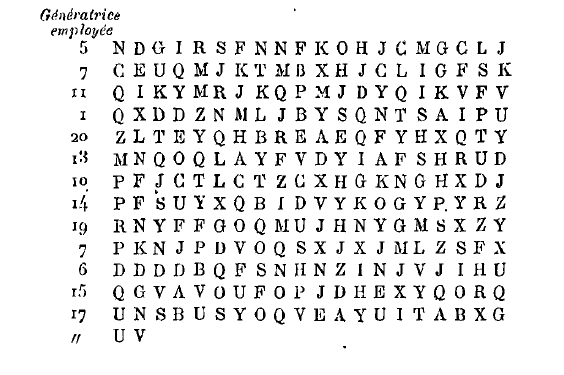

In [40]:
Image('deViaris1.png')

In [41]:
crypto1 = '\
N D G I R S F N N F K O H J C M G C L J\
C E U Q M J K T M B X H J G L I G F S K\
Q I K Y M R J K Q P M J D Y Q I K V F V\
Q X D D Z N M L J B Y S Q N T S A I P U\
Z L T E Y Q H B R E A E Q F Y H X Q T Y\
M N Q O Q L A Y F V D Y I A F S H R U D\
P F J C T L C T Z C X H G K N G H X D J\
P F S U Y X Q B I D V Y K O G Y P Y R Z\
R N Y F F G O Q M U J H N Y G M S X Z Y\
P K N J P D V O Q S X J X J M L Z S F X\
D D D D B Q F S N H N Z I N J V J I H U\
Q G V A V O U F O P J D H E X Y Q O R Q\
U N S B U S Y O Q V E A Y U I T A B X G\
U V'
crypto1 = crypto1.replace(' ', '')
crypto1, len(crypto1)

('NDGIRSFNNFKOHJCMGCLJCEUQMJKTMBXHJGLIGFSKQIKYMRJKQPMJDYQIKVFVQXDDZNMLJBYSQNTSAIPUZLTEYQHBREAEQFYHXQTYMNQOQLAYFVDYIAFSHRUDPFJCTLCTZCXHGKNGHXDJPFSUYXQBIDVYKOGYPYRZRNYFFGOQMUJHNYGMSXZYPKNJPDVOQSXJXJMLZSFXDDDDBQFSNHNZINJVJIHUQGVAVOUFOPJDHEXYQORQUNSBUSYOQVEAYUITABXGUV',
 262)

In [42]:
recherche_clef_partielle(crypto1)

  9  2 14  3 17  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   103.39598
  ?  2 14  3 17  6  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   100.57431
  ?  ? 14  3 17  6 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    97.33345
  ?  ? 11  3 17  6 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   103.82486
  ?  ?  ?  3 17  6 18  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   100.72818
  ?  ?  ?  ? 18  9  4  7 19  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   112.81073
  ?  ?  ?  ?  ? 10  4 15 17 20  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   114.67642
  ?  ?  ?  ?  ?  ? 14  8 13 20 16  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   106.76419
  ?  ?  ?  ?  ?  ? 18  8 13 20 16  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   103.44975
  ?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  ?  ?  ?  ?  ?  ?  ?  ?  :   100.54813
  ?  ?  ?  ?  ?  ?  ?  ? 13 20 16 12  1  ?  ?  ?  ?  ?  ?  ?  :   193.86697
  ?  ?  ?  ?  ?  ?  ?  ?  ? 20 16 12  1 10  ?  ?  ?  ?  ?  ?  :   200.98744
  ?  ?  ?  ?  ?  ?  ?  ?  ?  3 20  2 15  1  ?  ?  ?  ?  ?  ?  :   119.73847
  ?  ?  ?  ?

On remarque qu'il y a de nombreux recoupements dans les clés partielles détectées.  
Essayons la clé de plus petit logscore :

In [43]:
clef_totale(crypto1, '?  ? 14  3 17  6 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

  ?  ? 14  3 17  6 18  8 13 20 16  ?  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ? 14  3 17  6 18  8 13 20 16 12  1  7 11  ?  ?  ?  ?  ?
  ?  ? 14  3 17  6 18  8 13 20 16 12  1  7 11  4 15  5 19  ?
  ?  ? 14  3 17  6 18  8 13 20 16 12  1  7 11  4 15  5 19  2
  9 10 14  3 17  6 18  8 13 20 16 12  1  7 11  4 15  5 19  2
LMPETITJOURNAEETLETYMMSONTDUVOUSAEPRENDUECEDECESDECEPRUVREMFNQIEURLUCASENAEVESIEANIDEMENTCESTPIENMADHXUREUXILLAISREINACQEZEUNEOEUVRETTESREMARSUABLESURLATIEORIEDEJNOMBRESLEPROMIERVFLGMEAPARUQUANNAUXDELAVAASVUUEFEOEZBAETEARJUILSNESONTPUSPRETEAMOIRLEJOURDEKONGTENDO
4583.3992825753485


C'est presque ça.  
Essayons une clé qui est proche en logscore :

In [44]:
clef_totale(crypto1, '?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  ?  ?  ?  ?  ?  ?  ?  ?')

  ?  ?  ?  3 17  6 18  8 13 20 16 12  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4  ?  ?  ?  ?
  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
  9  2 14  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
LEPETITJOURNALETLETEMPSONTDUVOUSAZPRENDRELEDECESDECEPAUVREMONSIEURLUCASENLEVESIRAPIDEMENTCESTBIENMALHEUREUXILLAISSEINACHEVEUNEOEUVRETRESREMARQUABLESURLATHEORIEDESNOMBRESLEPREMIERVOLUMEAPARUQUANTAUXDEUXAUTRESILEJTAPRESUMERQUILSNESONTPASPRETSAVOIRLEJOURDELONGTEMPS
1507.2163019579352


In [45]:
clef_totale(crypto1, '?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 12  1 10 11  4  ?  ?  ?  ?')

  ?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  1 10 11  4  ?  ?  ?  ?
  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4  ?  ?  ?  ?
  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
  9  2 14  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
LEPETITJOURNALETLETEMPSONTDUVOUSAZPRENDRELEDECESDECEPAUVREMONSIEURLUCASENLEVESIRAPIDEMENTCESTBIENMALHEUREUXILLAISSEINACHEVEUNEOEUVRETRESREMARQUABLESURLATHEORIEDESNOMBRESLEPREMIERVOLUMEAPARUQUANTAUXDEUXAUTRESILEJTAPRESUMERQUILSNESONTPASPRETSAVOIRLEJOURDELONGTEMPS
1507.2163019579352


On peut aussi remarquer que certaines clés proposées se recoupent bien :
````
  ?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ? 13 20 16 12  1  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ? 20 16 12  1 10  ?  ?  ?  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16 12  1 10 11  ?  ?  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 12  1 10 11  4  ?  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  1 10 11  4 15  ?  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 10 11  4 15  5  ?  ?
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 11  4 15  5 19  ?
  
  ?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  1 10 11  4 15  5 19  ?
````

In [46]:
clef_totale(crypto1, '?  ?  ?  ?  ?  ?  ?  8 13 20 16 12  1 10 11  4 15  5 19  ?')

  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  ?
  ?  ?  ?  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
  9  2 14  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7
LEPETITJOURNALETLETEMPSONTDUVOUSAZPRENDRELEDECESDECEPAUVREMONSIEURLUCASENLEVESIRAPIDEMENTCESTBIENMALHEUREUXILLAISSEINACHEVEUNEOEUVRETRESREMARQUABLESURLATHEORIEDESNOMBRESLEPREMIERVOLUMEAPARUQUANTAUXDEUXAUTRESILEJTAPRESUMERQUILSNESONTPASPRETSAVOIRLEJOURDELONGTEMPS
1507.2163019579352


La dépêche se lit :  
LE PETIT JOURNAL ET LE TEMPS ONT DU VOUS AZPRENDRE LE DECES DE CE PAUVRE MONSIEUR LUCAS ENLEVE SI RAPIDEMENT C EST BIEN MALHEUREUX IL LAISSE INACHEVE UNE OEUVRE TRES REMARQUABLE SUR LA THEORIE DES NOMBRES LE PREMIER VOLUME A PARU QUANT AUX DEUX AUTRES IL EJT A PRESUMER QU ILS NE SONT PAS PRETS A VOIR LE JOUR DE LONGTEMPS

On notera deux erreurs typographiques AZPRENDRE et EJT.  

On retrouve le texte donné par de Viaris (p.103) :

>Le _Petit Journal_ et le _Temps_ ont dû vous apprendre le décès de ce pauvre Monsieur Lucas enlevé
si rapidement, c’est bien malheureux. Il laisse inachevé(e) une oeuvre très remarquable sur la
théorie des nombres ; le premier volume a paru, quant aux deux autres il est à présumer qu’ils
ne sont pas prêts à voir le jour de longtemps.

La clé est
`9. 2. 14. 3. 17. 6. 18. 8. 13. 20. 16. 12. 1. 10. 11. 4. 15. 5. 19. 7.`  
et le mot-clé est LE PETIT JOURNAL.  
Vérification :

In [47]:
keyword2strkey('Le Petit Journal')

'  9  2 14  3 17  6 18  8 13 20 16 12  1 10 11  4 15  5 19  7'

### 3.2 Le deuxième cryptogramme

La deuxième dépêche fournie par Bazeries à de Viaris contient le mot "officier".  
On n'utilise ici que le texte de la dépêche :

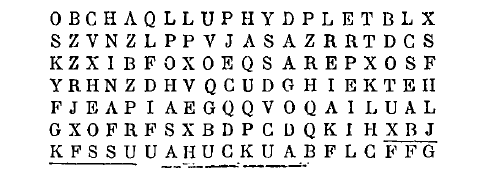

In [48]:
Image('deViaris2.png')

In [49]:
crypto2 = '\
O B C H A Q L L U P H Y D P L E T B L X\
S Z V N Z L P P V J A S A Z R R T D C S\
K Z X I B F O X O E Q S A R E P X O S F\
Y R H N Z D H V Q C U D G H I E K T E H\
F J E A P I A E G Q Q V O Q A I L U A L\
G X O F R F S X B D P C D Q K I H X B J\
K F S S U U A H U C K U A B F L C F F G'
crypto2 = crypto2.replace(' ', '')
crypto2, len(crypto2)

('OBCHAQLLUPHYDPLETBLXSZVNZLPPVJASAZRRTDCSKZXIBFOXOEQSAREPXOSFYRHNZDHVQCUDGHIEKTEHFJEAPIAEGQQVOQAILUALGXOFRFSXBDPCDQKIHXBJKFSSUUAHUCKUABFLCFFG',
 140)

In [50]:
recherche_clef_partielle(crypto2)

  ?  ?  ? 18  7 11 13  5  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    53.37514
  ?  ?  ?  ?  7 11 13  5 15  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    55.81725
  ?  ?  ?  ?  2 16  5  1  6  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    58.52288
  ?  ?  ?  ?  ? 11 13  5 15  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    51.96554
  ?  ?  ?  ?  ?  ? 13  5 15  8  4  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    54.51816
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  6 12 13  9 20  ?  ?  ?  ?  :    53.72952
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 14  5  8  6  3  ?  ?  ?  :   154.08817
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  8  2  6 13 15  ?  :    56.48040
----- terminé en  28 min 26 sec


In [51]:
clef_totale(crypto2, '?  ?  ?  ?  ? 11 13  5 15  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

  ?  1 17 18  7 11 13  5 15  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
  ?  1 17 18  7 11 13  5 15  8  4  2 19 20  ?  ?  ?  ?  ?  ?
  ?  1 17 18  7 11 13  5 15  8  4  2 19 20  9 12 14  6  ?  ?
  ?  1 17 18  7 11 13  5 15  8  4  2 19 20  9 12 14  6 16 10
  3  1 17 18  7 11 13  5 15  8  4  2 19 20  9 12 14  6 16 10
LEGENERALDEDIVISIONDEFILEALATETEDESADIVISIONAYANTAHUITMETRESDERRIERELUISONCHEFDETATMAJORETAKKBOFAKKDERRIERECELUICILESOFFICIERSDESONETATMAJOR
1247.4070614272196


LE GENERAL DE DIVISION DEFILE A LA TETE DE SA DIVISION AYANT A HUIT METRES DERRIERE LUI SON CHEF D ETAT MAJOR ET A KKBOFAKK DERRIERE CELUI CI LES OFFICIERS DE SON ETAT MAJOR

Par convention, le Commandant Bazeries propose de coder la ponctuation et les chiffres, en les encadrant entre des doubles K, par
````
  A  B  C  D  E  F  G  H  I  J       A  B  C  D  E  F  G  H  I  J
  .  ,  ;  :  '  !  ?  -  §  ()      0  1  2  3  4  5  6  7  8  9

````
et
````
  L : barre de fraction
  M : terminaison en ième
  N : terminaison en er ou o
  O : virgule entre deux chiffres
  P : mot "numéro"
  Q : mot "et" entre deux chiffres
````
Le mot KKBOFAKK se traduit donc par 1,50  
La dépêche est donc :
> Le général de division défile à la tête de sa division ayant à huit mètres derrière lui son
chef d'état-major et à 1,50 derrière celui-ci les officiers de son état-major.

La clé numérique est `3. 1. 17. 18. 7. 11. 13. 5. 15. 8. 4. 2. 19. 20. 9. 12. 14. 6. 16. 10.`  
Le mot-clé probable donné par de Viaris est BASSE INDRE.  
Vérification :

In [52]:
keyword2strkey('Basse-Indre')

'  3  1 17 18  7 11 13  5 15  8  4  2 19 20  9 12 14  6 16 10'

## 4. Les cryptogrammes d'Édouard Lucas

Le 19 septembre 1891, le mathématicien [Édouard Lucas](https://fr.wikipedia.org/wiki/%C3%89douard_Lucas) présente le cryptographe de Bazeries au vingtième congrès de l'Association française pour l'avancement des sciences qui a lieu, cette année-là, à Marseille.  
Dans les Actes du congrès (voir [Gallica](
http://gallica.bnf.fr/ark:/12148/bpt6k2011758/f163.image)) on trouve deux cryptogrammes.

### 4.1 Troisième cryptogramme

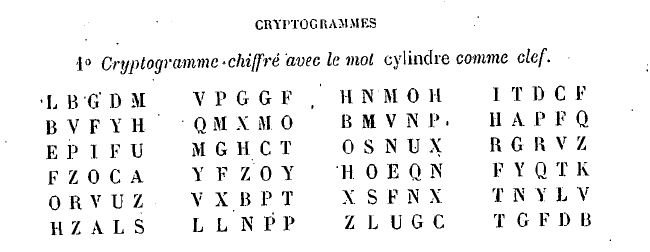

In [53]:
Image('Lucas1.png')

In [54]:
crypto3 = '\
LBGDM VPGGF HNMOH ITDCF \
BVFYH QMXMO BMVNP HAPFQ \
EPIFU MGHCT OSNUX RGRVZ \
FZOCA YFZOY HOEQN FYQTK \
ORVUZ VXBPT XSFNX TNYLV \
HZALS LLNPP ZLUGC TGFDB'
crypto3 = crypto3.replace(' ', '')
crypto3, len(crypto3)

('LBGDMVPGGFHNMOHITDCFBVFYHQMXMOBMVNPHAPFQEPIFUMGHCTOSNUXRGRVZFZOCAYFZOYHOEQNFYQTKORVUZVXBPTXSFNXTNYLVHZALSLLNPPZLUGCTGFDB',
 120)

In [55]:
recherche_clef_partielle(crypto3)

  1 18 11  8 14  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    44.50938
  ?  3 16  2 12  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    49.62751
  ?  ?  ?  8 14  4 16 19  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    48.17001
  ?  ?  ?  8 14  4 16 20  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    51.05016
  ?  ?  ?  8 14  4 16  9  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    51.35380
  ?  ?  ?  ?  ?  ?  ? 10 16 11  3  6  ?  ?  ?  ?  ?  ?  ?  ?  :   143.43026
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  2 11  1 18 19  ?  ?  ?  ?  :    49.05880
----- terminé en  24 min 50 sec


In [56]:
clef_totale(crypto3, '1 18 11  8 14  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

  1 18 11  8 14  4 16  6  2  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
  1 18 11  8 14  4 16  6  2 19 12  9 15  ?  ?  ?  ?  ?  ?  ?
  1 18 11  8 14  4 16  6  2 19 12  9 15  5 17  7  3  ?  ?  ?
  1 18 11  8 14  4 16  6  2 19 12  9 15  5 17  7  3 20 13 10
CECHIFFREESTABSOLUMENTINDECHIFFRABLELEIOMBREDECOMBINAISHNSETANTDEDEUXQUINTILLIONSILSERAITCHIMERIQUEDEVOULOIRLIRESANSCLEF
767.0056828727622


CE CHIFFRE EST ABSOLUMENT INDECHIFFRABLE LE IOMBRE DE COMBINAISHNS ETANT DE DEUX QUINTILLIONS IL SERAIT CHIMERIQUE DE VOULOIR LIRE SANS CLEF

La dépêche se lit, en corrigeant les erreurs typographiques :

>Ce chiffre est absolument indéchiffrable. Le nombre de combinaisons étant de deux quintillions, il serait chimérique de vouloir lire sans clef.

Vérification de la clé :

In [57]:
keyword2strkey('cylindre')

'  1 18 11  8 14  4 16  6  2 19 12  9 15  5 17  7  3 20 13 10'

### 4.2 Quatrième cryptogramme

Pour le second cryptogramme, on n'a aucune indication, si ce n'est un avertissement qui sonne comme un défi.

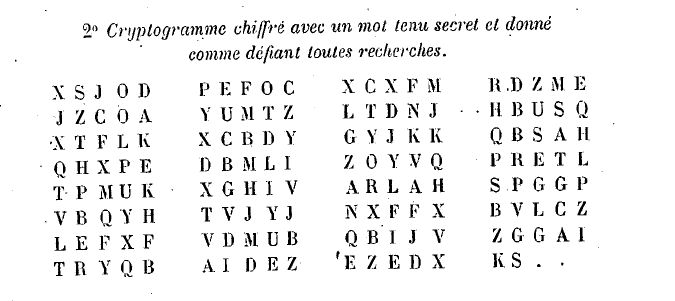

In [58]:
Image('Lucas2.png')

In [59]:
crypto4 = '\
XSJOD PEFOC XCXFM RDZME\
JZCOA YUMTZ LTDNJ HBUSQ\
XTFLK XCBDY GYJKK QBSAH\
QHXPE DBMLI ZOYVQ PRETL\
TPMUK XGHIV ARLAH SPGGP\
VBQYH TVJYJ NXFFX BVLCZ\
LEFXF VDMUB QBIJV ZGGAI\
TRYQB AIDEZ EZEDX KS'
crypto4 = crypto4.replace(' ', '')
crypto4, len(crypto4)

('XSJODPEFOCXCXFMRDZMEJZCOAYUMTZLTDNJHBUSQXTFLKXCBDYGYJKKQBSAHQHXPEDBMLIZOYVQPRETLTPMUKXGHIVARLAHSPGGPVBQYHTVJYJNXFFXBVLCZLEFXFVDMUBQBIJVZGGAITRYQBAIDEZEZEDXKS',
 157)

In [60]:
recherche_clef_partielle(crypto4)

 17 18 16 11  4  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    56.15209
  ?  ?  ? 10  3  2 11  1  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    58.27000
  ?  ?  ?  ?  ?  ?  ?  ?  ?  1 14 11 19  2  ?  ?  ?  ?  ?  ?  :    57.70533
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  2 10  1  4 12  ?  :    58.51738
----- terminé en  28 min 7 sec


Les résultats sont bien maigres !

In [61]:
clef_totale(crypto4, '17 18 16 11  4  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

 17 18 16 11  4  6  8 12  2  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
 17 18 16 11  4  6  8 12  2 19  7  3  1  ?  ?  ?  ?  ?  ?  ?
 17 18 16 11  4  6  8 12  2 19  7  3  1  5 20 14 10  ?  ?  ?
 17 18 16 11  4  6  8 12  2 19  7  3  1  5 20 14 10  9 15 13
YIMAALUMBLAGABRAUAQDUESDUAPAELFEIARRQHZLTPOINEOCYSINGNHKFDEBLANCSVADAORSJKEMJOFUYUFFEPITDIFARCQOAOQLOYEUXHKRMOUIPSASOQVNEMNQGXVROLMEHARYTFLOTRYQBAIDEZEZEDXKS
6331.331316615529


In [62]:
clef_totale(crypto4, ' ?  ?  ? 10  3  2 11  1  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

  ?  ?  ? 10  3  2 11  1 15 19 20  8  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ? 10  3  2 11  1 15 19 20  8  9  6  5 13  ?  ?  ?  ?
  ?  ?  ? 10  3  2 11  1 15 19 20  8  9  6  5 13 14 18 12 16
  4  7 17 10  3  2 11  1 15 19 20  8  9  6  5 13 14 18 12 16
OJZBLAONSIEIDEFUSSUHNMOETELIYOUPASLXTSMCEASEDNETEKESESOBELOLUGQDVURIRBRACESFOLKAXFGDISDEVATNEOETUBXCQQZULESORSEVMUOKOPGEPLAMEQUINCJJSNYPBAEYQUEXFOLGAHCELYSVY
6392.6704806823855


In [63]:
clef_totale(crypto4, ' ?  ?  ?  ?  ?  ?  ?  ?  ?  1 14 11 19  2  ?  ?  ?  ?  ?  ?')

  ?  ?  ?  ?  ? 18  6 16  7  1 14 11 19  2  ?  ?  ?  ?  ?  ?
  ?  5  8 12 17 18  6 16  7  1 14 11 19  2  ?  ?  ?  ?  ?  ?
  ?  5  8 12 17 18  6 16  7  1 14 11 19  2 15  9 13 10  ?  ?
  ?  5  8 12 17 18  6 16  7  1 14 11 19  2 15  9 13 10 20  3
  4  5  8 12 17 18  6 16  7  1 14 11 19  2 15  9 13 10 20  3
QNESPUSCDIEDEMYSBRYHGTJEDHEORCSSIRDYHOLTJJXNFIRIQLNNEEUTOGRSMCAYNBIGEMENTEIXDOCUEUXOHASILLYEMMEZSYUFTUBOMISIALUEIHIEZFBEECINTMERMIOPURRDTHIPRICVDCAPTBRSAGINU
5197.305239650311


In [64]:
clef_totale(crypto4, ' ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  2 10  1  4 12  ?')

  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 11  6 17  5  2 10  1  4 12  ?
  ?  ?  ?  ?  ?  ? 14 20  9 16 11  6 17  5  2 10  1  4 12  ?
  ?  ? 15 19  3 13 14 20  9 16 11  6 17  5  2 10  1  4 12  ?
  ?  ? 15 19  3 13 14 20  9 16 11  6 17  5  2 10  1  4 12  8
  7 18 15 19  3 13 14 20  9 16 11  6 17  5  2 10  1  4 12  8
DKQDPMGRYAUTAREJONDDAAIGMALEUHJDKYAUOHPAYDGBLBDDEZHUMELSCRIUZENSDAFRILCAERTTUBFAZXJGCETEBUTIVIONHOSEIDKRCILDCVOIAARARPLGTIPEKIMYASTAABORMADXRDSUFBDILITTOYESV
5955.513409211652


Rien ne marche. Ce cryptogramme est très étrange !

### 4.3 Est-ce que ce cryptogramme a bien été chiffré avec le cryptographe ?

Très déçu que mon programme ait échoué à casser ce cryptogramme, je me suis documenté pour savoir si d'autres chercheurs avaient été plus heureux.  
Je n'ai trouvé qu'une seule référence, le livre _Les chiffres secrets dévoilés_ du Commandant Bazeries lui-même.

À propos du livre de Viaris (p. 76):  
> Ce livre de 175 pages a surtout voulu prouver que le cryptographe cylindrique Bazeries pouvait être déchiffré.  
M. de Viaris abandonne son système de numération (p.61 de _Cryptographie_) et adopte celui indiqué par nous, en 1891, au Congrès de Marseille pour l'avancement des sciences.  
Il déchiffre ensuite des cryptogrammes faits avec le cryptographe cylindrique et pour lesquels de nombreuses indications lui avaient été données. Il arrive enfin à déchiffrer des cryptogrammes, _ne connaissant rien ?_  
Il est regrettable que le cryptogramme fait en 1891 par M. Édouard Lucas, qui figure au _Compte Rendu du Congrès de Marseille_ cryptogramme que M. de Viaris a cependant fortement travaillé, ne figure pas parmi ceux qu'il a traduits. Cette traduction aurait été la preuve concluante que son procédé de déchiffrement est infaillible.  
Mais nous sommes tranquilles, nul ne déchiffrera ce cryptogramme, tant que nous n'aurons pas livré le mot clef. Il figure d'ailleurs à l'_Appendice (Note VII)_. Les alphabets dont on s'_est servi_ sont donnés au chapitre III de la troisième partie.

A l'_Appendice (Note VII)_ on trouve exactement le même cryptogramme que celui du _Compte Rendu_, donc il n'y a pas d'erreur typographique.

D'autre part, Bazeries affirme n'utiliser d'autres alphabets que ceux définis dans son livre et qui sont ceux donnés en haut de cette page. Donc il n'a pas utilisé d'autres rondelles surnuméraires pour embêter de Viaris.

À la page 251 de son livre, il reprend sa diatribe contre de Viaris :
>M. de Viaris, dont nous avons parlé au chapitre II de la deuxième partie de cette étude, a trouvé, _en théorie_, une formule mathématique de déchiffrement.  
Cette formule _mathématique_ n'a pu cependant aboutir à donner la traduction du cryptogramme de feu M. Édouard Lucas, qui termine l'exposé de l'appareil fait au Congrès de Marseille de 1891 pour l'avancement des sciences.  
Le chiffre donné par le cryptographe cylindrique ne craint aucune espèce de recherche ni d'investigation; il est absolument indéchiffrable pour quiconque ne possède pas le mot secret. Il ne craint que la livraison du mot clef.

Le livre du Commandant Bazeries ayant été publié en 1901, on peut supposer qu'à cette date le cryptogramme n'était toujours pas décrypté.

### 4.4 Une petite modification

Après avoir cherché, sans succès, avec d'autres langues que le français, j'ai pensé que, plutôt que d'utiliser _plus_ de 20 rondelles, le chiffreur avait peut-être utilisé _moins_ de 20 rondelles. Rien n'empêche de monter le cryptographe à la clé normalement, puis de relever le crypto sur les génératrices par segments de 17 caractères, par exemple, au lieu de 20. Dans ce cas, quand on essaie de le déchiffrer avec des segments de 20, on a un décalage de 3 entre les différents segments et rien ne correspond.  
Puisque le cryptogramme est écrit en groupes de 5, la valeur 15 est peut-être préférable à 17.  
Essayons.

In [65]:
recherche_clef_partielle(crypto4, key_len=15)

 13  4 16 19 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    84.84092
  ?  ?  ?  1 13  6 16 11  ?  ?  ?  ?  ?  ?  ?  :    80.30701
  ?  ?  ?  ? 17  4  9 11  5  ?  ?  ?  ?  ?  ?  :    77.47737
  ?  ?  ?  ?  ?  4  9 11  5 13  ?  ?  ?  ?  ?  :    78.34175
  ?  ?  ?  ?  ?  ?  9 11  5 13  6  ?  ?  ?  ?  :    80.34535
  ?  ?  ?  ?  ?  ? 14  6 15  7 12  ?  ?  ?  ?  :    84.35409
  ?  ?  ?  ?  ?  ?  8  5  7 14 20  ?  ?  ?  ?  :   174.63937
  ?  ?  ?  ?  ?  ?  5  2  1 15 18  ?  ?  ?  ?  :    84.18186
  ?  ?  ?  ?  ?  ?  ? 11  5 13  6 15  ?  ?  ?  :    76.52205
  ?  ?  ?  ?  ?  ?  ?  ?  1 15 14 11 19  ?  ?  :    89.00431
  ?  ?  ?  ?  ?  ?  ?  ?  1 15 14 11  9  ?  ?  :    87.48650
  ?  ?  ?  ?  ?  ?  ?  ?  3 15 19 14 20  ?  ?  :    80.52928
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 13 10 12  9  4  :    83.92342
----- terminé en  26 min 42 sec


On a des clés qui se recoupent, c'est bon signe !

In [66]:
clef_totale(crypto4, '?  ?  ?  ?  ?  ?  ? 11  5 13  6 15  ?  ?  ?')

  ?  ?  ? 19 17  4  9 11  5 13  6 15  ?  ?  ?
  ?  ?  ? 19 17  4  9 11  5 13  6 15 20 18  7
 12  3 14 19 17  4  9 11  5 13  6 15 20 18  7
AUCUNTRAVAILPUBLIEENFRANCEAVANTLEPOQUEDUCONGRESNEPOURRAETREREPRODUITDANSLESCOMPTESRENDUSLETITREETLINDICATIONBIBLIOGRAPHIQUEFIGURERONTSEULSDANSLEPREMIERVOLUME
628.0683997715118


**Bingo !**

AUCUN TRAVAIL PUBLIE EN FRANCE AVANT L EPOQUE DU CONGRES NE POURRA ETRE REPRODUIT DANS LES COMPTES RENDUS LE TITRE ET L INDICATION BIBLIOGRAPHIQUE FIGURERONT SEULS DANS LE PREMIER VOLUME

Une recherche sur internet donne l'origine de ce texte :

Association française pour l'avancement des sciences - 1876 - Règlement - article 66

>Aucun travail, publié en France avant l'époque du Congrès, ne pourra être reproduit dans les comptes rendus : le titre seul et l'indication bibliographique figureront seuls dans ce volume.

Voir [archive.org](https://archive.org/stream/comptesrendusde03sciegoog#page/n22/mode/2up)

Une attaque au dictionnaire donne le mot-clé REGLEMENT :

In [67]:
keyword2strkey('REGLEMENT')

' 16  1  8 10  2 12  3 14 19 17  4  9 11  5 13  6 15 20 18  7'

On voit que ce sont les quinze _dernières_ rondelles qui ont été utilisées pour chiffrer la dépêche.  
Le marquis de Viaris n'avait aucune chance de décrypter cette dépêche avec des segments de 20 caractères. Néanmoins, sa méthode serait tout à fait efficace en découpant le cryptogramme en tranches de 15 caractères.

Il est possible, comme l'affirme le Commandant Bazeries, que ce soit Édouard Lucas qui ait eu l'idée de n'utiliser que quinze rondelles pour chiffrer la dépêche; on sait qu'il était féru de cryptographie et qu'il entretenait une correspondance sur ce sujet avec de Viaris.

Je demande à toute personne qui lit ces lignes et qui aurait des informations sur ce cryptogramme de bien vouloir me les communiquer. D'avance merci.  
Mon email : <A HREF="mailto:Rossignol@bribes.org">Rossignol@bribes.org</A>.

## 5. Exercices

On trouvera ci-dessous quelques cryptogrammes à déchiffrer pour les lecteurs qui voudraient vérifier / modifier / améliorer l'attaque présentée ici.

### Dépêche n° 1

````
AQDPG UEAZC VOPFX BJOUX LIRFU TQMTB ZSXBT YDYLI IFXDQ YEAVM   
IGNBT EGRDI XPMQV JNRHL USCPB LINMA OGLBX TBUBU UMNSD TYMTB  
CMJIE VUNUB ZTFDZ XREZV CQEOP XOCPU EQLYA PGKNR IKMFV DXGME  
JOLPC DXFRH VHTBP AKSVQ YBHYC MXGAI QYJIV TKYLO PUXUY IHBED  
UKXAC TSBEV NDUUD IOUPM XVHPG NMMCJ IRTRY JUXIR AUYCY IJXLT  
HYXYO CTAIY IMTRB JCZML BI
````

### Dépêche n° 2

````
VBGQA CGZJU GDBCJ VDUBN KXMRS FHHIR GQMFQ AGJMV CFSBX YLMCQ  
LFHVB RLIHH MSNLK NVUOV RTAAF NEBRO LUCZP PLXAA NABIY YAAVC  
JQAEF AFZJB TVRCC ZCXAA XJPAN
````

### Dépêche n°3

````
OMKHT MYGBA PRKMB JYUBD MSQAB RIKRC NHCTG ATHPN HPTAN RHTYE  
LYIFZ YUTON YFJOJ CAKIS AVFFK HDFCO KYKRJ LPZZY JGBYO AODBC  
CUOUT BOHQH IQYXZ FICMK YLOYJ MVVGO JLNPT IJMGQ VUJKJ
````

### Dispatch \#4

````
KPRAU YIZRY BKFXJ AVFKV FEHHF YTAGU PCSHS FLKVQ ZCBYH UTFLU  
LFPUX CCNRJ OLGPN HZYNY NEAUL GKNYE HGBYQ SMEJP OKPDQ VBJGT  
CMPSE YBPFX MXENH AILPC AQJOF SLISL VBKUG EMTMC BFPFE RYNAI  
SZRCI PNRNC BEYSA EKNUN DMOYP DYBBL RQTOF PTVFK GTJIA HCKAZ  
JGACI GQPFG QAB
````

### Dépêche n° 5

15 rondelles utilisées.
````
ITRED KZCSX RLGFH LIOOO UJUIE UEPFE OFZUB FDYHL DCUCH YLIPS  
XPBAV HZQDF LOTBC LKKMS MTRLX YRCXT XRRUR YXTCG CPHOC UMEFA  
VBZLC KZOLC JHTCI JLIKP XNPZV FNKZU TSIDL QMKJH FRQBE CCGFF  
XDVBT PCYBE XBGRS IQTVP DNXYN SHVVI UDAJG VLOTH OLXMK OVCOD  
SEEBJ KKEYV IFEYA OMPSN DSCLZ LYCIX KAAZ
````

### Dépêche n° 6

Le nombre de rondelles utilisées est entre 15 et 20.
````
LGSJR BJDGZ TVRNJ PPSTP EVRFV ZNPQZ SIFKT SGFPI GEJTH DQCYD  
BBPTE QRSPC LVARO ATUNP UVCHL HUOCS AAZEM XALZE SSTIT KMALC  
FYVBJ XBXGO GKCHT ZLIKA QNFXN DAGTD TEYRD MVCIL ZAHAD LNDHY
QSH
````

## 6. Conclusion

Cette page a présenté une attaque efficiente à texte chiffré seulement (ciphertext-only attack) du cryptographe de Bazeries. Sauf erreur de ma part, je pense que c'est la première à être publiée. Toutes les attaques que j'ai vu sont du type attaque de de Viaris, donc avec un mot probable.

Le code Python de cette page n'est pas optimisé. Ce n'est pas non plus un modèle de programmation, loin de là. Sa seule prétention est de fonctionner.

Pour que l'attaque réussisse, il faut un cryptogramme assez long - au moins six génératrices, c'est-à-dire 120 caractères. En dessous de cette taille, la solution n'est pas assurée. En cas d'échec, on peut essayer d'augmenter le paramètre `nb_top` fixé par défaut à 10; le nombre de clés partielles détectées augmente, mais aussi le temps de traitement.

Les fonctions contiennent de nombreux paramètres pour pouvoir être réutilisées avec un minimum de modifications avec d'autres cryptographes comme le [M-94 américain](cryptographe_M94.html).

## Références

* Marquis Gaëtan de Viaris - L'art de chiffrer et déchiffrer les dépêches secrètes  
  G. Masson (Paris) 1893
  
* Commandant Étienne Bazeries - Les chiffres secrets dévoilés  
  Charpentier et Fasquelle (Paris) 1901
  
* Lambros Callimahos and William Friedman - Military Cryptanalytics Part II Volume 2  
  Aegean Park Press 1985
  
* William Friedman - The Riverbank Publications Volume 2  
  Publication No. 20 Several Machine Ciphers and Methods for their Solution  
  Aegean Park Press 1979
  

****
Le 27/01/2017 - Contact : <A HREF="mailto:Rossignol@bribes.org">Rossignol@bribes.org</A> 